In [69]:
import mnist
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sb
import os
import cv2
import numpy as np

Загрузим данные для обучения и тестирования

In [124]:
x_train = mnist.train_images()
y_train = mnist.train_labels()
x_test = mnist.test_images()
y_test = mnist.test_labels()

Просмотрим загруженные данные

In [7]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test:  {x_test.shape}')
print(f'y_test:  {y_test.shape}')

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


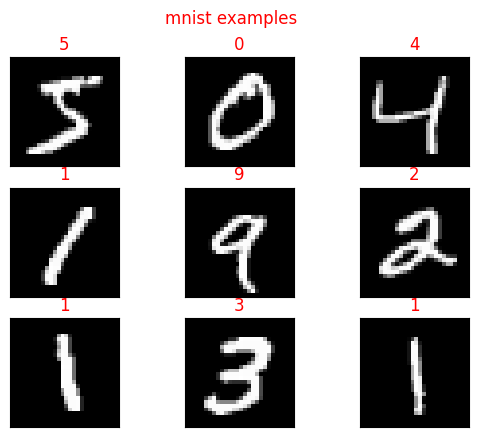

In [125]:
for i in range(9):  
    plt.subplot(331 + i)
    plt.title(y_train[i], color='red')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
plt.suptitle("mnist examples", color='red')
plt.show()

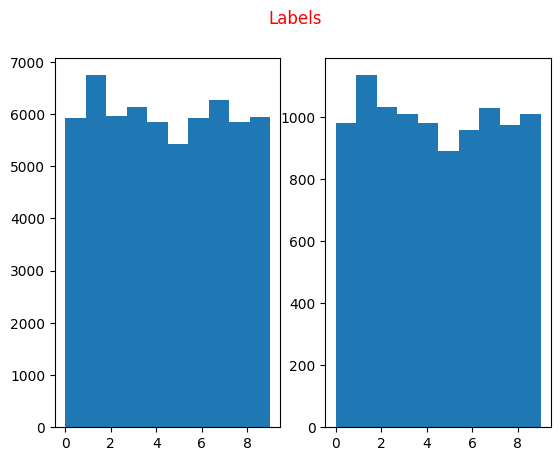

In [31]:
fig, ax = plt.subplots(1,2)
ax[0].hist(y_train)
ax[1].hist(y_test)
fig.show
plt.suptitle("Labels", color='red')
plt.show()

Переведем изображения в линейный вид

In [43]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
print(f'x_train: {x_train.shape}')
print(f'x_test:  {x_test.shape}')

x_train: (60000, 784)
x_test:  (10000, 784)


In [ ]:
Обучим модель SVM

In [44]:
svm = LinearSVC(dual=False)
svm.fit(x_train, y_train)

LinearSVC(dual=False)

Получим предсказание модели для тестовых данных

In [45]:
predict = svm.predict(x_test)

Оценим качество модели

In [46]:
print(f"Accuracy: {accuracy_score(y_test, predict)}")

Accuracy: 0.9169


Проверим ошибки распознавания отдельных классов с помощью матрицы ошибок

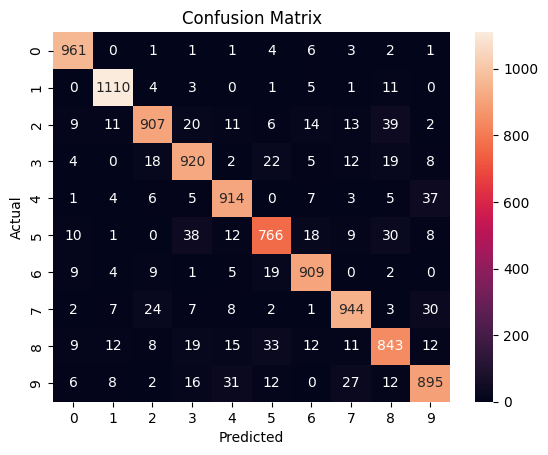

In [52]:
matr = confusion_matrix(y_true = y_test, y_pred = predict)
plt.subplots()
sb.heatmap(matr, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Оценим метрики для отдельных классов

In [54]:
print(classification_report(y_true=y_test, y_pred=predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.89      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Проверим обученную модель на самостоятельно нарисованных цифрах

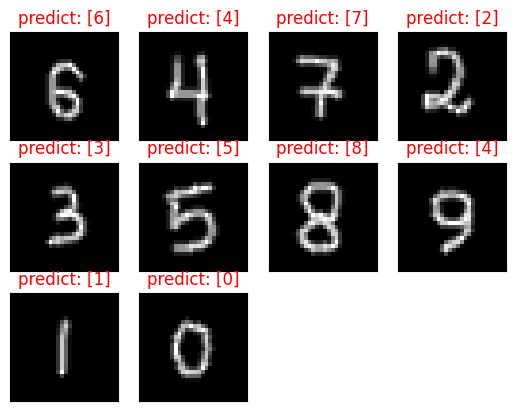

In [122]:
for i, name in enumerate(os.listdir('images')):
    plt.subplot(3,4,1 + i)
    img = cv2.imread('images/' + name)
    img_array = np.asarray(img)
    resized = cv2.resize(img_array, (28, 28 ))
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    image = cv2.bitwise_not(gray_scale)
    plt.title(f'predict: {svm.predict(image.reshape(1, 28*28))}', color='red')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap='gray')
plt.show()